## Econ570 Assigment2 
## Zezhao Li 
## 6020657455

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from numpy import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import mean_squared_error
import math
import warnings
warnings.filterwarnings('ignore')
import graphviz as gr
import plotly
import plotly.express as px

## Setting 1 :Simulate a DGP where the outcome of interest depends on a randomly assigned treatment and some observed covariates.

In [3]:
n=100

In [4]:
tm=random.randint(2,size=(n))

In [5]:
x1=random.rand(n)*100
x2=random.rand(n)*100
x3=random.rand(n)*100

In [6]:
y=3*tm+2*x1+4*x2+5*x3
df=pd.DataFrame({"y":y,"tm":tm,"x1":x1,"x2":x2,"x3":x3})
df.to_csv('covariates.csv')

In [7]:
plotly.offline.init_notebook_mode(connected=True)
fig = px.scatter(df, x="tm", y="y", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white",color_discrete_sequence=["purple"])
fig.show()

In [8]:
plotly.offline.init_notebook_mode(connected=True)
fig = px.scatter(df, x="x1", y="y", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white",color_discrete_sequence=["purple"])
fig.show()

In [9]:
plotly.offline.init_notebook_mode(connected=True)
fig = px.scatter(df, x="x2", y="y", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white",color_discrete_sequence=["purple"])
fig.show()

In [10]:
plotly.offline.init_notebook_mode(connected=True)
fig = px.scatter(df, x="x3", y="y", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white",color_discrete_sequence=["purple"])
fig.show()

### Example of real-life situation

#### Inflation in the United States has repeatedly hit new highs recently due to rising oil prices. Suppose the outcome is **Employment rate**, the treatment is **CPI**, I am very curious about the impact of high inflation (CPI) on unemployment. I list three observed covariates that affect the outcome but might not related to the treatment:    **Labor demand, Age** and **Saving**.
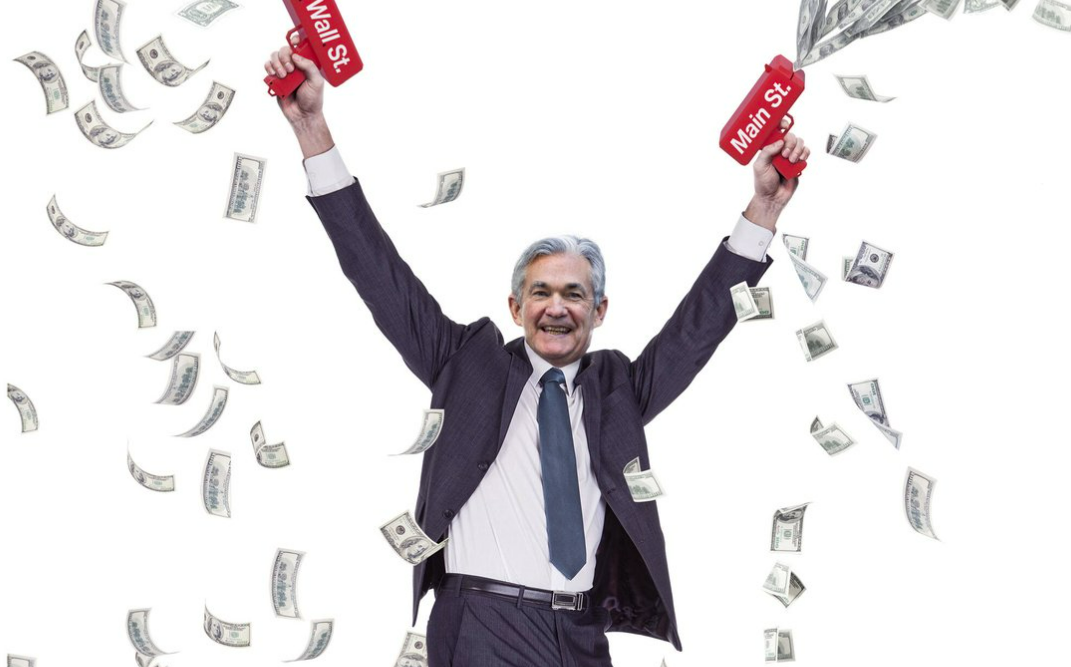

### DAG 1

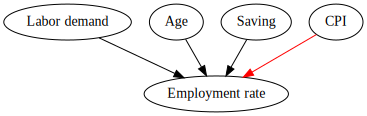

In [11]:
g = gr.Digraph()
g.edge("Labor demand", "Employment rate")
g.edge("Age", "Employment rate")
g.edge("Saving", "Employment rate")
g.edge("CPI", "Employment rate" ,color = 'red')

g

#### Create a ols with the treatment and 3 covariates

In [12]:
results= smf.ols('y~tm+x1+x2+x3',data=df).fit()

#### Controling for all covariates that affect outcome

In [13]:
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.236e+31
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:12:25   Log-Likelihood:                 2836.8
No. Observations:                 100   AIC:                            -5664.
Df Residuals:                      95   BIC:                            -5651.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.705e-13   4.37e-14      3.900      0.000    8.37e-14    2.57e-13
tm             3.0000   2.39e-14   1.26e+14      0.000       3.000       3.000
x1             2.0000   4.03e-16   4.96e+15      0.000       2.000       2.000
x2             4.0000   4.42e-16   9.04e+15      0.000       4.000       4.000
x3             5.0000   4.02e-16   1.24e+16      0.000       5.000       5.000
==============================================================================
Omnibus:                        1.084   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.997
Skew:                           0.026   Prob(JB):                        0.607
Kurtosis:                       2.514   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print("bias:{}".format(mean_squared_error(results.predict(df[["tm","x1","x2","x3"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results.predict(df[["tm","x1","x2","x3"]]),y))))

bias:1.341745114697831e-26
rmse:1.1583372197671242e-13


#### Not controlling for covariates:

In [15]:
results1= smf.ols('y~tm',data=df).fit()
display(results1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1216
Date:                Thu, 14 Apr 2022   Prob (F-statistic):              0.728
Time:                        14:12:25   Log-Likelihood:                -656.58
No. Observations:                 100   AIC:                             1317.
Df Residuals:                      98   BIC:                             1322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    537.9679     24.805     21.688      0.000     488.744     587.192
tm            12.1110     34.734      0.349      0.728     -56.817      81.039
==============================================================================
Omnibus:                        1.947   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.721
Skew:                           0.199   Prob(JB):                        0.423
Kurtosis:                       2.496   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print("bias:{}".format(mean_squared_error(results1.predict(df[["tm"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results1.predict(df[["tm"]]),y))))

bias:5741.674556397787
rmse:75.77383820552966


### Monte Carlo (Change the sample size to 1000 )

In [17]:
n =1000
tm1=random.randint(2,size=(n))
x1=random.rand(n)*100
x2=random.rand(n)*100
x3=random.rand(n)*100
y=3*tm1+2*x1+4*x2+5*x3
df=pd.DataFrame({"y":y,"tm1":tm1,"x1":x1,"x2":x2,"x3":x3})
results= smf.ols('y~tm1+x1+x2+x3',data=df).fit()
display(results.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.198e+32
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:12:25   Log-Likelihood:                 27492.
No. Observations:                1000   AIC:                        -5.497e+04
Df Residuals:                     995   BIC:                        -5.495e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.558e-13   2.96e-14     -8.653      0.000   -3.14e-13   -1.98e-13
tm1            3.0000   1.76e-14    1.7e+14      0.000       3.000       3.000
x1             2.0000   3.07e-16   6.52e+15      0.000       2.000       2.000
x2             4.0000   3.09e-16    1.3e+16      0.000       4.000       4.000
x3             5.0000   3.03e-16   1.65e+16      0.000       5.000       5.000
==============================================================================
Omnibus:                       39.548   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.301
Skew:                          -0.080   Prob(JB):                     0.000106
Kurtosis:                       2.357   Cond. No.                         312.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print("bias:{}".format(mean_squared_error(results.predict(df[["tm1","x1","x2","x3"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results.predict(df[["tm1","x1","x2","x3"]]),y))))

bias:7.728120665297059e-26
rmse:2.7799497594915376e-13


#### Not contorlling for covariates: 

In [19]:
results1= smf.ols('y~tm1',data=df).fit()
display(results1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.002523
Date:                Thu, 14 Apr 2022   Prob (F-statistic):              0.960
Time:                        14:12:25   Log-Likelihood:                -6681.1
No. Observations:                1000   AIC:                         1.337e+04
Df Residuals:                     998   BIC:                         1.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    553.0536      8.476     65.252      0.000     536.421     569.686
tm1            0.6138     12.221      0.050      0.960     -23.368      24.595
==============================================================================
Omnibus:                       29.010   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.874
Skew:                          -0.069   Prob(JB):                     0.000589
Kurtosis:                       2.418   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print("bias:{}".format(mean_squared_error(results1.predict(df[["tm1"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results1.predict(df[["tm1"]]),y))))

bias:37209.13638262166
rmse:192.8966987343787


## DGP 2: Simulate a DGP with a confounder (common cause)

### Example of real-life situation

#### In the soccer field, a topic that people talk about is whether the Premier League is the first league in the world. I would like to study whether being a Premier League team has a positive effect on winning the Champions League, team value will influence the result of the Premier League team and also affect the final ranking situation. In that case, team value should be a confounder in this example and we need to control for it to obtain a accruate estimator of the treatment effect
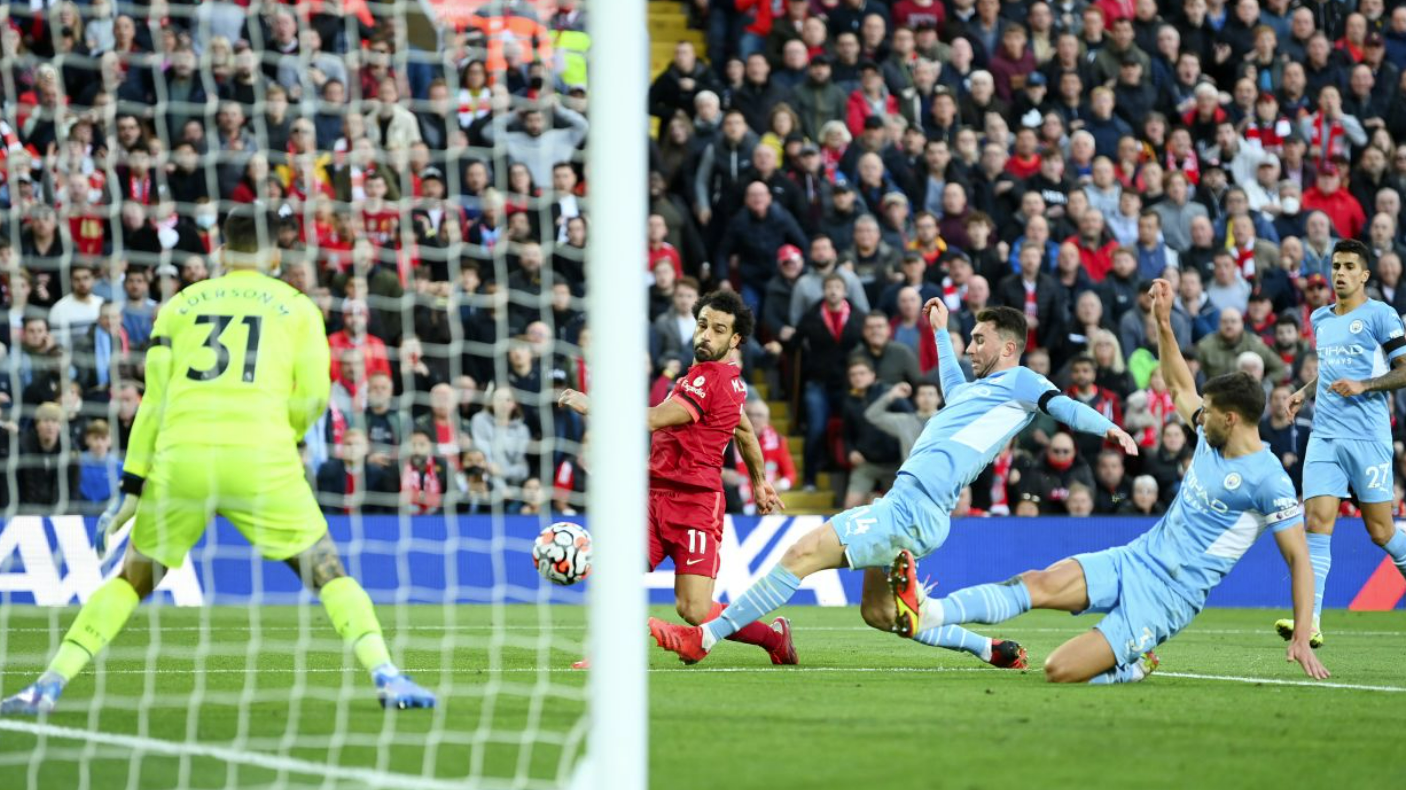

### DAG 2

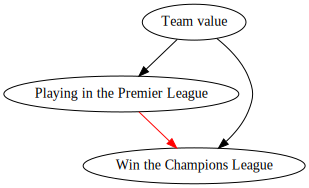

In [21]:
g2 = gr.Digraph()

g2.edge("Playing in the Premier League", "Win the Champions League",color ='red')
g2.edge("Team value", "Win the Champions League")
g2.edge("Team value", "Playing in the Premier League")

g2

In [22]:
n = 100
c=random.rand(n)*100
tm=2.5 * c +random.rand(n)*100
y= 3.5 * tm + 1.5 * c

In [23]:
df = pd.DataFrame({'tm':tm,'confounder':c,'y':y})
df.to_csv('cofounder.csv')

In [24]:
results= smf.ols('y~tm+confounder',data=df).fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.121e+31
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:12:26   Log-Likelihood:                 2728.1
No. Observations:                 100   AIC:                            -5450.
Df Residuals:                      97   BIC:                            -5442.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.05e-13   9.25e-14      4.379      0.000    2.21e-13    5.89e-13
tm             3.5000   1.22e-15   2.87e+15      0.000       3.500       3.500
confounder     1.5000   3.26e-15    4.6e+14      0.000       1.500       1.500
==============================================================================
Omnibus:                        3.132   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                2.498
Skew:                          -0.257   Prob(JB):                        0.287
Kurtosis:                       2.421   Cond. No.                         540.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print("bias:{}".format(mean_squared_error(results.predict(df[["tm","confounder"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results.predict(df[["tm","confounder"]]),y))))

bias:1.1784193528808727e-25
rmse:3.4328113156433063e-13


#### Controlling for confounder

In [26]:
results1= smf.ols('y~tm',data=df).fit()
display(results1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.804e+04
Date:                Thu, 14 Apr 2022   Prob (F-statistic):          9.79e-129
Time:                        14:12:26   Log-Likelihood:                -419.41
No. Observations:                 100   AIC:                             842.8
Df Residuals:                      98   BIC:                             848.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2279      4.015     -3.793      0.000     -23.196      -7.260
tm             4.0231      0.021    195.031      0.000       3.982       4.064
==============================================================================
Omnibus:                        5.818   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                2.672
Skew:                          -0.027   Prob(JB):                        0.263
Kurtosis:                       2.201   Cond. No.                         482.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print("bias:{}".format(mean_squared_error(results1.predict(df[["tm"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results1.predict(df[["tm"]]),y))))

bias:257.3013537505588
rmse:16.04061575347277


### Monte Carlo（ 1000 ）

In [28]:
n = 1000
c=random.rand(n)*100
tm=2.5 * c +random.rand(n)*100
y= 3.5 * tm + 1.5 * c
df = pd.DataFrame({'tm':tm,'confounder':c,'y':y})
results= smf.ols('y~tm+confounder',data=df).fit()
display(results.summary())
print("bias:{}".format(mean_squared_error(results.predict(df[["tm","confounder"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results.predict(df[["tm","confounder"]]),y))))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.801e+33
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:12:26   Log-Likelihood:                 28034.
No. Observations:                1000   AIC:                        -5.606e+04
Df Residuals:                     997   BIC:                        -5.605e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.02e-13   1.35e-14     22.407      0.000    2.76e-13    3.28e-13
tm             3.5000   1.76e-16   1.99e+16      0.000       3.500       3.500
confounder     1.5000   4.73e-16   3.17e+15      0.000       1.500       1.500
==============================================================================
Omnibus:                      107.653   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.671
Skew:                           0.809   Prob(JB):                     1.91e-33
Kurtosis:                       4.000   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

bias:2.6160647101046115e-26
rmse:1.6174253337031084e-13


In [29]:
results1= smf.ols('y~tm',data=df).fit()
display(results1.summary())
print("bias:{}".format(mean_squared_error(results1.predict(df[["tm"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results1.predict(df[["tm"]]),y))))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.558e+05
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:12:26   Log-Likelihood:                -4207.6
No. Observations:                1000   AIC:                             8419.
Df Residuals:                     998   BIC:                             8429.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.9503      1.280    -10.899      0.000     -16.462     -11.438
tm             4.0153      0.007    596.464      0.000       4.002       4.029
==============================================================================
Omnibus:                      132.620   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.199
Skew:                          -0.032   Prob(JB):                     3.75e-08
Kurtosis:                       2.096   Cond. No.                         473.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

bias:264.3374933906867
rmse:16.258459133346147


## DGP 3: Simulate a DGP with selection bias into the treatment (variable in between the path from the treatment to the outcome)

### Example of real-life situation

#### A mediating variable explains the process through which two variables are related，For example, sleep quality can affect student's GPA through the mediator of learning efficiency.
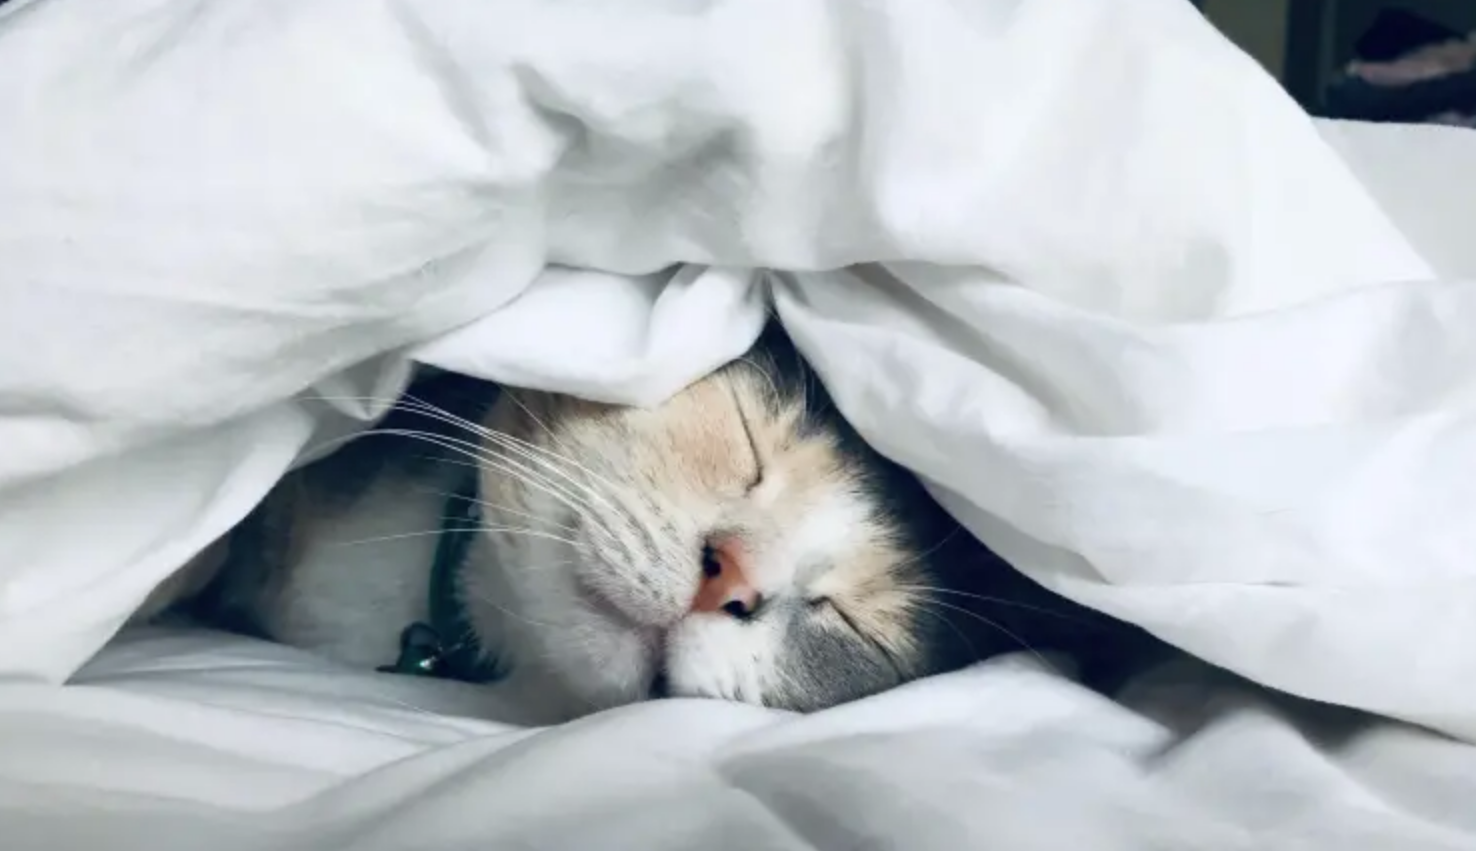

### DAG 3

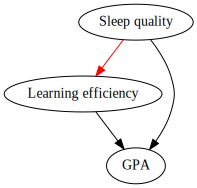

In [30]:
g3 = gr.Digraph()

g3.edge("Sleep quality", "Learning efficiency",color ='red')
g3.edge("Sleep quality", "GPA")
g3.edge("Learning efficiency", "GPA")

g3

#### 100 samples

In [31]:
n = 100
tm=random.rand(n)*100
x=3.8*tm + random.rand(n)*100 
y= 2.6 * x
df = pd.DataFrame({'tm':tm,'x':x,'y':y})
df.to_csv('selection_bias.csv')
results= smf.ols('y~tm+x',data=df).fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.712e+31
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:12:26   Log-Likelihood:                 2715.2
No. Observations:                 100   AIC:                            -5424.
Df Residuals:                      97   BIC:                            -5417.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.421e-13      1e-13      1.417      0.160    -5.7e-14    3.41e-13
tm          -1.91e-14   5.73e-15     -3.335      0.001   -3.05e-14   -7.73e-15
x              2.6000   1.42e-15   1.83e+15      0.000       2.600       2.600
==============================================================================
Omnibus:                        8.954   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                3.439
Skew:                          -0.082   Prob(JB):                        0.179
Kurtosis:                       2.107   Cond. No.                         652.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print("bias:{}".format(mean_squared_error(results.predict(df[["tm","x"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results.predict(df[["tm","x"]]),y))))

bias:1.5271539331511843e-25
rmse:3.907881693643225e-13


In [33]:
results1= smf.ols('y~tm',data=df).fit()
display(results1.summary())
print("bias:{}".format(mean_squared_error(results1.predict(df[["tm"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results1.predict(df[["tm"]]),y))))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1488.
Date:                Thu, 14 Apr 2022   Prob (F-statistic):           4.66e-61
Time:                        14:12:26   Log-Likelihood:                -570.43
No. Observations:                 100   AIC:                             1145.
Df Residuals:                      98   BIC:                             1150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    118.1755     14.193      8.326      0.000      90.009     146.342
tm            10.1513      0.263     38.580      0.000       9.629      10.673
==============================================================================
Omnibus:                       24.216   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.337
Skew:                          -0.051   Prob(JB):                       0.0694
Kurtosis:                       1.873   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

bias:5274.6991609682955
rmse:72.62712414083526


### Monte Carlo（ 1000）

In [34]:
n = 1000
tm=random.rand(n)*100
x=3.8*tm + random.rand(n)*100 
y= 2.6 * x


df = pd.DataFrame({'tm':tm,'x':x,'y':y})
results= smf.ols('y~tm+x',data=df).fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.575e+32
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:12:26   Log-Likelihood:                 26850.
No. Observations:                1000   AIC:                        -5.369e+04
Df Residuals:                     997   BIC:                        -5.368e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.167e-13   4.47e-14      4.848      0.000    1.29e-13    3.04e-13
tm           2.22e-16   2.24e-15      0.099      0.921   -4.18e-15    4.62e-15
x              2.6000   5.74e-16   4.53e+15      0.000       2.600       2.600
==============================================================================
Omnibus:                      251.320   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.542
Skew:                           0.090   Prob(JB):                     1.29e-10
Kurtosis:                       1.970   Cond. No.                         735.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print("bias:{}".format(mean_squared_error(results.predict(df[["tm","x"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results.predict(df[["tm","x"]]),y))))

bias:2.7921178906575336e-25
rmse:5.284049479951464e-13


In [36]:
results1= smf.ols('y~tm',data=df).fit()
display(results1.summary())
print("bias:{}".format(mean_squared_error(results1.predict(df[["tm"]]),y)))
print("rmse:{}".format(math.sqrt(mean_squared_error(results1.predict(df[["tm"]]),y))))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.434e+04
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:12:26   Log-Likelihood:                -5746.7
No. Observations:                1000   AIC:                         1.150e+04
Df Residuals:                     998   BIC:                         1.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    133.7391      4.809     27.813      0.000     124.303     143.175
tm             9.8116      0.082    119.750      0.000       9.651       9.972
==============================================================================
Omnibus:                      882.804   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.208
Skew:                           0.001   Prob(JB):                     3.10e-14
Kurtosis:                       1.778   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

bias:5741.674556397787
rmse:75.77383820552966


## Thank you!